# ***Machine Learning Analysis of Customer Determinants for Term Deposit Subscriptions***



In [29]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a "DataFrame" (a pandas table)
df = pd.read_csv('/content/bank-additional-full.csv')

In [30]:
# Show the first 5 rows of the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
# Count how many "yes" and "no" responses there are
df['y'].value_counts()

,count
y,
no,36548
yes,4640


In [32]:
# How many rows and columns do we have?
print("Data shape:", df.shape)  # Output: (rows, columns)

# Basic stats for numeric columns (age, balance, etc.)
print(df.describe())

# Check class imbalance again
print("\nSubscription counts:")
print(df['y'].value_counts())

Data shape: (41188, 21)
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.5

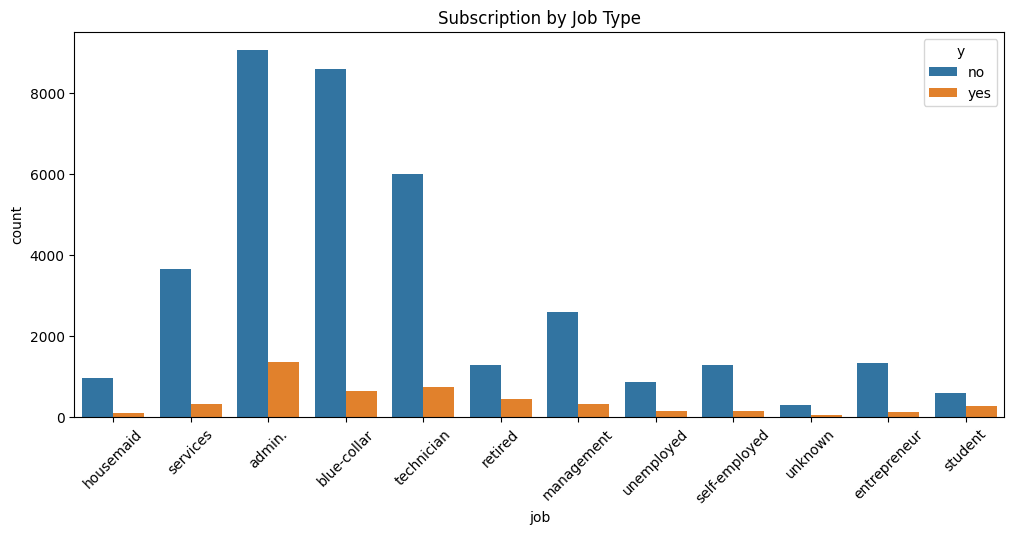

In [33]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='job', hue='y')
plt.title("Subscription by Job Type")
plt.xticks(rotation=45)  # Rotate job labels for readability
plt.show()

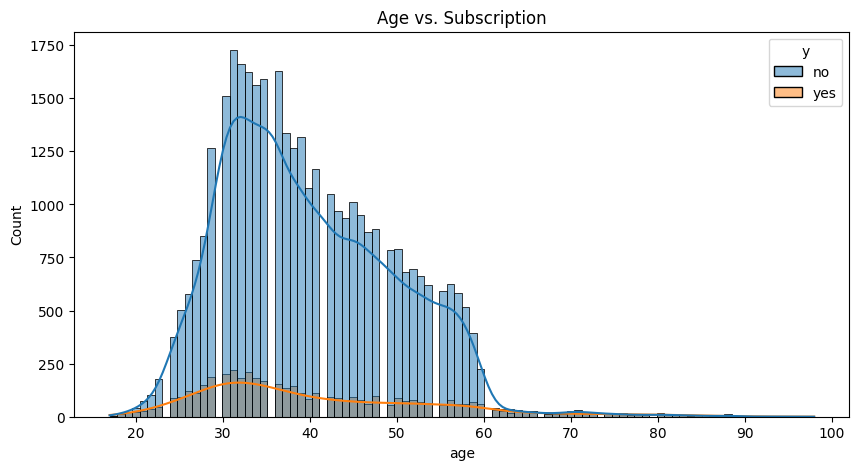

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='y', kde=True)
plt.title("Age vs. Subscription")
plt.show()

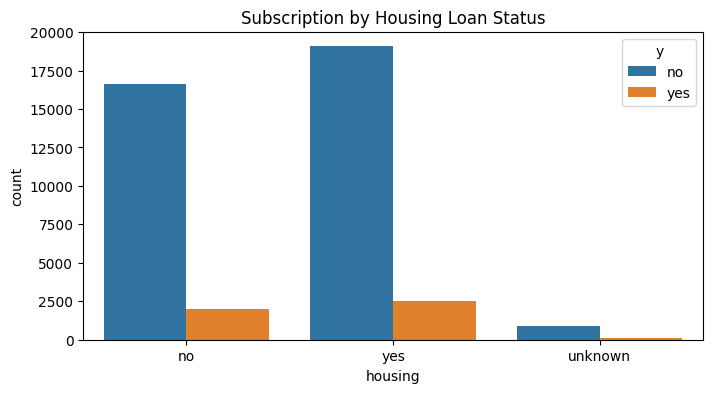

In [37]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='housing', hue='y')
plt.title("Subscription by Housing Loan Status")
plt.show()

In [38]:
# List of categorical columns to convert
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [39]:
df_encoded = df_encoded.drop(['duration', 'campaign', 'pdays'], axis=1)

In [40]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_encoded.drop('y', axis=1)  # Everything except 'y'
y = df_encoded['y'].map({'yes': 1, 'no': 0})  # Convert to 1/0

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [42]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
lr = LogisticRegression(max_iter=1000)  # Increase iterations for better training
lr.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf = RandomForestClassifier(random_state=42)  # random_state ensures reproducibility
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [44]:
from sklearn.metrics import classification_report

# Predictions for Logistic Regression
y_pred_lr = lr.predict(X_test)

# Predictions for Random Forest
y_pred_rf = rf.predict(X_test)

# Compare performance
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7310
           1       0.34      0.46      0.39       928

    accuracy                           0.84      8238
   macro avg       0.63      0.67      0.65      8238
weighted avg       0.86      0.84      0.85      8238


Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7310
           1       0.44      0.39      0.42       928

    accuracy                           0.88      8238
   macro avg       0.68      0.66      0.67      8238
weighted avg       0.87      0.88      0.87      8238



In [45]:
# Get feature importances from Random Forest
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Top 10 important features
print("Top 10 Features:")
print(feature_importance.head(10))

Top 10 Features:
euribor3m                      0.166344
age                            0.126724
nr.employed                    0.076147
poutcome_success               0.041003
emp.var.rate                   0.039922
cons.price.idx                 0.036862
cons.conf.idx                  0.036633
education_university.degree    0.027026
education_high.school          0.024342
day_of_week_tue                0.023941
dtype: float64


Total test customers: 8238
Targeted customers (prob > 70%): 377

Overall success rate: 11.26%
Targeted success rate: 52.79%
Improvement: 4.7x


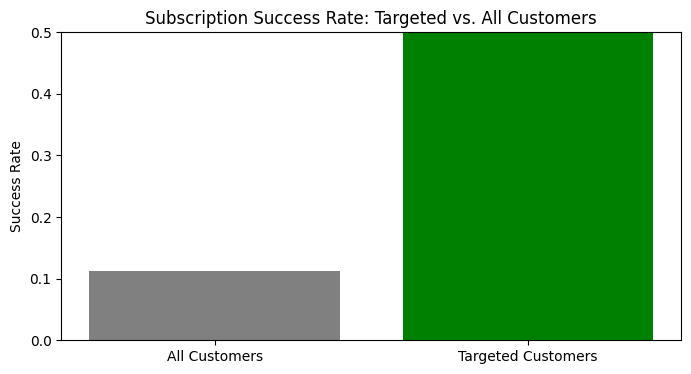

In [47]:
# Import libraries (if not already imported)
import matplotlib.pyplot as plt

# Get predicted probabilities for "yes" (class 1)
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities of subscribing

# Filter customers with >70% probability of subscribing
high_prob_customers = y_prob > 0.7
targeted_customers = X_test[high_prob_customers]  # Features of high-probability customers
targeted_y_true = y_test[high_prob_customers]     # Actual subscriptions for these customers

# Calculate success rates
overall_success_rate = y_test.mean()               # Baseline success rate (all customers)
targeted_success_rate = targeted_y_true.mean()     # Success rate for targeted customers

# Print results
print(f"Total test customers: {len(X_test)}")
print(f"Targeted customers (prob > 70%): {len(targeted_customers)}")
print(f"\nOverall success rate: {overall_success_rate:.2%}")
print(f"Targeted success rate: {targeted_success_rate:.2%}")
print(f"Improvement: {targeted_success_rate / overall_success_rate:.1f}x")

# Visualize
plt.figure(figsize=(8, 4))
plt.bar(['All Customers', 'Targeted Customers'], [overall_success_rate, targeted_success_rate], color=['gray', 'green'])
plt.title('Subscription Success Rate: Targeted vs. All Customers')
plt.ylabel('Success Rate')
plt.ylim(0, 0.5)
plt.show()